In [124]:
import pandas as pd

Algorthims I will want to perform are

Time Series Analysis:

    Autoregressive Integrated Moving Average (ARIMA)
    
Machine Learning Models:

    Linear Regression (for trend prediction)
    Decision Trees and Random Forests (for classification or regression tasks)


In [125]:
df = pd.read_csv("SnP500 All assets.csv", low_memory=False)

In [126]:
# lets do some data prerpocessing and see what I need to do to make this work
df.head()

,Unnamed: 0,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.493,Volume.494,Volume.495,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502
0,NaN,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
3,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
4,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN


In [127]:
df.rename(columns={df.columns[0]: 'date'}, inplace=True)

In [128]:
df

,date,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.493,Volume.494,Volume.495,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502
0,NaN,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
3,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
4,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,2023-06-29,117.82500457763672,17.600000381469727,68.2300033569336,189.58999633789062,133.22999572753906,190.52000427246094,107.66000366210938,73.02999877929688,308.3299865722656,...,1354700,2881900,11364400,995300,958700.0,1525200,1169900,310000,2917900,1429000.0
3397,2023-06-30,120.25,17.940000534057617,70.30000305175781,193.97000122070312,134.72999572753906,192.42999267578125,109.0199966430664,74.8499984741211,308.5799865722656,...,1349400,3298700,13542700,1218300,1278100.0,1391800,1281900,342400,3698700,2061100.0
3398,2023-07-03,119.31999969482422,18.100000381469727,70.94999694824219,192.4600067138672,135.00999450683594,190.9199981689453,107.22000122070312,73.98999786376953,310.9700012207031,...,1120300,1375000,7397000,657500,700900.0,845600,662500,184100,2621400,742900.0
3399,2023-07-05,119.5,18.31999969482422,71.16000366210938,191.3300018310547,137.6199951171875,190.64999389648438,107.37000274658203,73.62000274658203,309.8999938964844,...,3301900,4555300,12478100,1210900,1036100.0,1743100,1181600,369000,3181200,1702400.0


I need to drop the second row in this dataframe

In [129]:
df = df.drop(1)
df

,date,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.493,Volume.494,Volume.495,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502
0,NaN,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
3,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
4,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
5,2010-01-07,19.91301727294922,4.939965724945068,36.794769287109375,6.392177104949951,NaN,21.066225051879883,19.446474075317383,7.886666774749756,33.229061126708984,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,2023-06-29,117.82500457763672,17.600000381469727,68.2300033569336,189.58999633789062,133.22999572753906,190.52000427246094,107.66000366210938,73.02999877929688,308.3299865722656,...,1354700,2881900,11364400,995300,958700.0,1525200,1169900,310000,2917900,1429000.0
3397,2023-06-30,120.25,17.940000534057617,70.30000305175781,193.97000122070312,134.72999572753906,192.42999267578125,109.0199966430664,74.8499984741211,308.5799865722656,...,1349400,3298700,13542700,1218300,1278100.0,1391800,1281900,342400,3698700,2061100.0
3398,2023-07-03,119.31999969482422,18.100000381469727,70.94999694824219,192.4600067138672,135.00999450683594,190.9199981689453,107.22000122070312,73.98999786376953,310.9700012207031,...,1120300,1375000,7397000,657500,700900.0,845600,662500,184100,2621400,742900.0
3399,2023-07-05,119.5,18.31999969482422,71.16000366210938,191.3300018310547,137.6199951171875,190.64999389648438,107.37000274658203,73.62000274658203,309.8999938964844,...,3301900,4555300,12478100,1210900,1036100.0,1743100,1181600,369000,3181200,1702400.0


Index is all messed up, lets change that!

In [130]:
df = df.reset_index(drop=True)

In [131]:
df

,date,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.493,Volume.494,Volume.495,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502
0,NaN,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
2,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
3,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
4,2010-01-07,19.91301727294922,4.939965724945068,36.794769287109375,6.392177104949951,NaN,21.066225051879883,19.446474075317383,7.886666774749756,33.229061126708984,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,2023-06-29,117.82500457763672,17.600000381469727,68.2300033569336,189.58999633789062,133.22999572753906,190.52000427246094,107.66000366210938,73.02999877929688,308.3299865722656,...,1354700,2881900,11364400,995300,958700.0,1525200,1169900,310000,2917900,1429000.0
3396,2023-06-30,120.25,17.940000534057617,70.30000305175781,193.97000122070312,134.72999572753906,192.42999267578125,109.0199966430664,74.8499984741211,308.5799865722656,...,1349400,3298700,13542700,1218300,1278100.0,1391800,1281900,342400,3698700,2061100.0
3397,2023-07-03,119.31999969482422,18.100000381469727,70.94999694824219,192.4600067138672,135.00999450683594,190.9199981689453,107.22000122070312,73.98999786376953,310.9700012207031,...,1120300,1375000,7397000,657500,700900.0,845600,662500,184100,2621400,742900.0
3398,2023-07-05,119.5,18.31999969482422,71.16000366210938,191.3300018310547,137.6199951171875,190.64999389648438,107.37000274658203,73.62000274658203,309.8999938964844,...,3301900,4555300,12478100,1210900,1036100.0,1743100,1181600,369000,3181200,1702400.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Columns: 2516 entries, date to Volume.502
dtypes: object(2516)
memory usage: 65.3+ MB


In [133]:
# Extract stock initials from the first row
stock_initials = df.iloc[0]

# Rename columns
for col in df.columns:
    df.rename(columns={col: f"{stock_initials[col]}_{col}"}, inplace=True)

# Drop the first row containing stock initials
df.drop(df.index[0], inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)
df.head()

,nan_date,A_Close,AAL_Close.1,AAP_Close.2,AAPL_Close.3,ABBV_Close.4,ABC_Close.5,ABT_Close.6,ACGL_Close.7,ACN_Close.8,...,WYNN_Volume.493,XEL_Volume.494,XOM_Volume.495,XRAY_Volume.496,XYL_Volume.497,YUM_Volume.498,ZBH_Volume.499,ZBRA_Volume.500,ZION_Volume.501,ZTS_Volume.502
0,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
1,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
2,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
3,2010-01-07,19.91301727294922,4.939965724945068,36.794769287109375,6.392177104949951,NaN,21.066225051879883,19.446474075317383,7.886666774749756,33.229061126708984,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN
4,2010-01-08,19.906551361083984,4.845691204071045,36.940189361572266,6.434673309326172,NaN,21.29511833190918,19.54588508605957,7.871110916137695,33.096885681152344,...,1539800,1599100,24891800,803600,NaN,3772392,2213985,266500,6903000,NaN


In [134]:
# now i need to rename the columns again to get rid of the .1
new_columns = {col: col.split('.')[0] for col in df.columns}
df = df.rename(columns=new_columns)

In [135]:
df.head()

,nan_date,A_Close,AAL_Close,AAP_Close,AAPL_Close,ABBV_Close,ABC_Close,ABT_Close,ACGL_Close,ACN_Close,...,WYNN_Volume,XEL_Volume,XOM_Volume,XRAY_Volume,XYL_Volume,YUM_Volume,ZBH_Volume,ZBRA_Volume,ZION_Volume,ZTS_Volume
0,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
1,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
2,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
3,2010-01-07,19.91301727294922,4.939965724945068,36.794769287109375,6.392177104949951,NaN,21.066225051879883,19.446474075317383,7.886666774749756,33.229061126708984,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN
4,2010-01-08,19.906551361083984,4.845691204071045,36.940189361572266,6.434673309326172,NaN,21.29511833190918,19.54588508605957,7.871110916137695,33.096885681152344,...,1539800,1599100,24891800,803600,NaN,3772392,2213985,266500,6903000,NaN


In [136]:
df.rename(columns={df.columns[0]: 'date'}, inplace=True)
df.head()

,date,A_Close,AAL_Close,AAP_Close,AAPL_Close,ABBV_Close,ABC_Close,ABT_Close,ACGL_Close,ACN_Close,...,WYNN_Volume,XEL_Volume,XOM_Volume,XRAY_Volume,XYL_Volume,YUM_Volume,ZBH_Volume,ZBRA_Volume,ZION_Volume,ZTS_Volume
0,2010-01-04,20.22970962524414,4.496876239776611,36.703857421875,6.496294021606445,NaN,21.769250869750977,19.33639907836914,7.994443893432617,32.708152770996094,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
1,2010-01-05,20.00995445251465,5.005956649780273,36.48569869995117,6.5075249671936035,NaN,21.613935470581055,19.180171966552734,7.967778205871582,32.91030502319336,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
2,2010-01-06,19.938871383666992,4.798553466796875,36.80384826660156,6.404016017913818,NaN,21.409570693969727,19.28668975830078,7.933332920074463,33.260162353515625,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
3,2010-01-07,19.91301727294922,4.939965724945068,36.794769287109375,6.392177104949951,NaN,21.066225051879883,19.446474075317383,7.886666774749756,33.229061126708984,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN
4,2010-01-08,19.906551361083984,4.845691204071045,36.940189361572266,6.434673309326172,NaN,21.29511833190918,19.54588508605957,7.871110916137695,33.096885681152344,...,1539800,1599100,24891800,803600,NaN,3772392,2213985,266500,6903000,NaN


In [137]:
df.tail()

,date,A_Close,AAL_Close,AAP_Close,AAPL_Close,ABBV_Close,ABC_Close,ABT_Close,ACGL_Close,ACN_Close,...,WYNN_Volume,XEL_Volume,XOM_Volume,XRAY_Volume,XYL_Volume,YUM_Volume,ZBH_Volume,ZBRA_Volume,ZION_Volume,ZTS_Volume
3394,2023-06-29,117.82500457763672,17.600000381469727,68.2300033569336,189.58999633789062,133.22999572753906,190.52000427246094,107.66000366210938,73.02999877929688,308.3299865722656,...,1354700,2881900,11364400,995300,958700.0,1525200,1169900,310000,2917900,1429000.0
3395,2023-06-30,120.25,17.940000534057617,70.30000305175781,193.97000122070312,134.72999572753906,192.42999267578125,109.0199966430664,74.8499984741211,308.5799865722656,...,1349400,3298700,13542700,1218300,1278100.0,1391800,1281900,342400,3698700,2061100.0
3396,2023-07-03,119.31999969482422,18.100000381469727,70.94999694824219,192.4600067138672,135.00999450683594,190.9199981689453,107.22000122070312,73.98999786376953,310.9700012207031,...,1120300,1375000,7397000,657500,700900.0,845600,662500,184100,2621400,742900.0
3397,2023-07-05,119.5,18.31999969482422,71.16000366210938,191.3300018310547,137.6199951171875,190.64999389648438,107.37000274658203,73.62000274658203,309.8999938964844,...,3301900,4555300,12478100,1210900,1036100.0,1743100,1181600,369000,3181200,1702400.0
3398,2023-07-06,117.41999816894531,17.769899368286133,69.41500091552734,189.61990356445312,137.29209899902344,191.44000244140625,106.31500244140625,73.48999786376953,305.2449951171875,...,909815,743047,4495541,214266,312830.0,339813,180725,81970,1941690,361515.0


Next i need to combine the Close, Open, Volume, High, and Low columns for each individual stock and graph them over time starting from the first date, I cant wait to see when some stocks dip out of the market and which dip into it. I am sure a bunch has changed since 2010. First thing I will do was see what company A is

In [138]:
df['AAP_Close'] = pd.to_numeric(df['AAP_Close'])
df['AAPL_Close'] = pd.to_numeric(df['AAPL_Close'])

<AxesSubplot:>

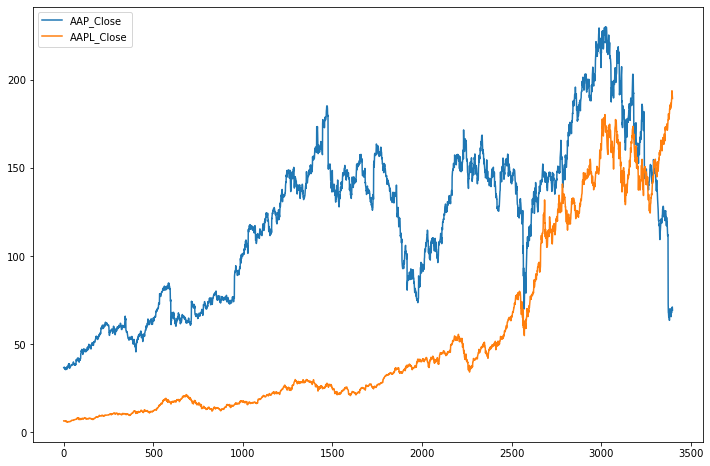

In [139]:
df[['AAP_Close', 'AAPL_Close']].plot(figsize=(12,8))

got the close date to show 

In [140]:
# making every column type float so I can run analysis on every cell element
df.iloc[:, 1:] = df.iloc[:,1:].apply(pd.to_numeric)

In [141]:
df['AAL_Close'] = pd.to_numeric(df['AAL_Close'])

In [142]:
df.dtypes

date            object
A_Close        float64
AAL_Close      float64
AAP_Close      float64
AAPL_Close     float64
                ...   
YUM_Volume       int64
ZBH_Volume       int64
ZBRA_Volume      int64
ZION_Volume      int64
ZTS_Volume     float64
Length: 2516, dtype: object

now lets take the sum of all the close/open/high/low/ volume

In [143]:
#empty dataframe
df_totals = pd.DataFrame()

# Filter columns that contain the word "Open"
open_columns = [col for col in df.columns if 'Open' in col]

# Create a new column that is the sum of all "Open" columns
df_totals['Total_Open'] = df[open_columns].sum(axis=1)


In [144]:
# Filter columns that contain the word "Open"
close_columns = [col for col in df.columns if 'Close' in col]

# Create a new column that is the sum of all "Open" columns
df_totals['Total_Close'] = df[close_columns].sum(axis=1)

# Filter columns that contain the word "Open"
low_columns = [col for col in df.columns if 'Low' in col]

# Create a new column that is the sum of all "Open" columns
df_totals['Total_Low'] = df[low_columns].sum(axis=1)

# Filter columns that contain the word "Open"
high_columns = [col for col in df.columns if 'High' in col]

# Create a new column that is the sum of all "Open" columns
df_totals['Total_High'] = df[high_columns].sum(axis=1)

# Filter columns that contain the word "Open"
volume_columns = [col for col in df.columns if 'Volume' in col]

# Create a new column that is the sum of all "Open" columns
df_totals['Total_Volume'] = df[volume_columns].sum(axis=1)

Now i need to see all of the NaN or null values, 

In [145]:
df_totals["Dates"] = df['date']

In [146]:
df_totals

,Total_Open,Total_Close,Total_Low,Total_High,Total_Volume,Dates
0,12415.698175,12481.633364,12308.841885,12578.294874,3.421950e+09,2010-01-04
1,12503.423868,12549.075785,12357.135966,12648.954226,4.317237e+09,2010-01-05
2,12538.871001,12561.659921,12423.520540,12681.729542,4.122507e+09,2010-01-06
3,12553.936086,12634.185132,12434.536835,12736.925737,4.518989e+09,2010-01-07
4,12594.379785,12662.159914,12485.826901,12749.526747,3.816431e+09,2010-01-08
...,...,...,...,...,...,...
3394,90788.247395,91464.769900,90208.352383,91932.282440,2.163008e+09,2023-06-29
3395,92115.065109,92440.014869,91460.930101,93042.940327,2.495099e+09,2023-06-30
3396,92144.551339,92357.973735,91401.348504,92964.950679,1.238964e+09,2023-07-03
3397,91906.049659,91894.529694,91020.936208,92697.688808,2.117216e+09,2023-07-05


<AxesSubplot:>

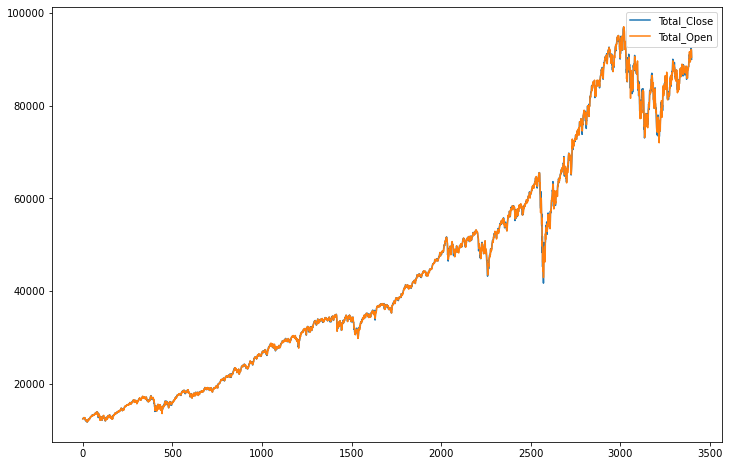

In [147]:
df_totals[['Total_Close', 'Total_Open']].plot(figsize=(12,8))

In [148]:
df_totals["Tomorrow"] = df_totals["Total_Close"].shift(-1)
df_totals

,Total_Open,Total_Close,Total_Low,Total_High,Total_Volume,Dates,Tomorrow
0,12415.698175,12481.633364,12308.841885,12578.294874,3.421950e+09,2010-01-04,12549.075785
1,12503.423868,12549.075785,12357.135966,12648.954226,4.317237e+09,2010-01-05,12561.659921
2,12538.871001,12561.659921,12423.520540,12681.729542,4.122507e+09,2010-01-06,12634.185132
3,12553.936086,12634.185132,12434.536835,12736.925737,4.518989e+09,2010-01-07,12662.159914
4,12594.379785,12662.159914,12485.826901,12749.526747,3.816431e+09,2010-01-08,12689.644789
...,...,...,...,...,...,...,...
3394,90788.247395,91464.769900,90208.352383,91932.282440,2.163008e+09,2023-06-29,92440.014869
3395,92115.065109,92440.014869,91460.930101,93042.940327,2.495099e+09,2023-06-30,92357.973735
3396,92144.551339,92357.973735,91401.348504,92964.950679,1.238964e+09,2023-07-03,91894.529694
3397,91906.049659,91894.529694,91020.936208,92697.688808,2.117216e+09,2023-07-05,90052.603505


In [149]:
df_totals['Target'] = (df_totals['Tomorrow']> df_totals["Total_Close"]).astype(int)

In [150]:
df_totals

,Total_Open,Total_Close,Total_Low,Total_High,Total_Volume,Dates,Tomorrow,Target
0,12415.698175,12481.633364,12308.841885,12578.294874,3.421950e+09,2010-01-04,12549.075785,1
1,12503.423868,12549.075785,12357.135966,12648.954226,4.317237e+09,2010-01-05,12561.659921,1
2,12538.871001,12561.659921,12423.520540,12681.729542,4.122507e+09,2010-01-06,12634.185132,1
3,12553.936086,12634.185132,12434.536835,12736.925737,4.518989e+09,2010-01-07,12662.159914,1
4,12594.379785,12662.159914,12485.826901,12749.526747,3.816431e+09,2010-01-08,12689.644789,1
...,...,...,...,...,...,...,...,...
3394,90788.247395,91464.769900,90208.352383,91932.282440,2.163008e+09,2023-06-29,92440.014869,1
3395,92115.065109,92440.014869,91460.930101,93042.940327,2.495099e+09,2023-06-30,92357.973735,0
3396,92144.551339,92357.973735,91401.348504,92964.950679,1.238964e+09,2023-07-03,91894.529694,0
3397,91906.049659,91894.529694,91020.936208,92697.688808,2.117216e+09,2023-07-05,90052.603505,0


In [151]:
df_totals['Dates'] = pd.to_datetime(df_totals['Dates'])
df_totals.set_index('Dates', inplace=True)

In [152]:
df_totals

,Total_Open,Total_Close,Total_Low,Total_High,Total_Volume,Tomorrow,Target
Dates,,,,,,,
2010-01-04,12415.698175,12481.633364,12308.841885,12578.294874,3.421950e+09,12549.075785,1
2010-01-05,12503.423868,12549.075785,12357.135966,12648.954226,4.317237e+09,12561.659921,1
2010-01-06,12538.871001,12561.659921,12423.520540,12681.729542,4.122507e+09,12634.185132,1
2010-01-07,12553.936086,12634.185132,12434.536835,12736.925737,4.518989e+09,12662.159914,1
2010-01-08,12594.379785,12662.159914,12485.826901,12749.526747,3.816431e+09,12689.644789,1
...,...,...,...,...,...,...,...
2023-06-29,90788.247395,91464.769900,90208.352383,91932.282440,2.163008e+09,92440.014869,1
2023-06-30,92115.065109,92440.014869,91460.930101,93042.940327,2.495099e+09,92357.973735,0
2023-07-03,92144.551339,92357.973735,91401.348504,92964.950679,1.238964e+09,91894.529694,0


# Model

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=5)

train = df_totals.iloc[:-100]
test = df_totals.iloc[-100:]

predictors = ["Total_Close", "Total_Volume", 'Total_Open','Total_High', 'Total_Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=5)

In [155]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [156]:
preds = pd.Series(preds, index=test.index)

In [157]:
precision_score(test['Target'], preds)

0.48333333333333334

In [158]:
combined = pd.concat([test['Target'], preds], axis=1)

<AxesSubplot:xlabel='Dates'>

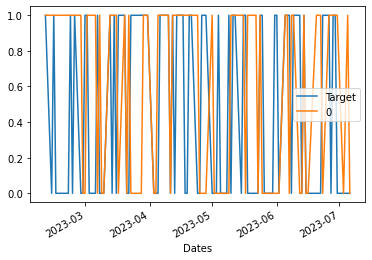

In [159]:
combined.plot()

In [160]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [161]:
def backtest(data, model, predictors, start=2000, step=200):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [162]:
predictions = backtest(df_totals, model, predictors)

In [163]:
predictions['Predictions'].value_counts()

0    857
1    542
Name: Predictions, dtype: int64

In [164]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5129151291512916

In [165]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.546819
0    0.453181
Name: Target, dtype: float64

In [166]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df_totals.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df_totals[ratio_column] = df_totals["Total_Close"]/ rolling_averages["Total_Close"]
    
    trend_column = f"Trend_{horizon}"
    df_totals[trend_column] = df_totals.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [167]:
df_totals =df_totals.dropna()

In [168]:
df_totals

,Total_Open,Total_Close,Total_Low,Total_High,Total_Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Dates,,,,,,,,,,,,,,,,,
2013-12-23,26798.837929,26795.799147,26591.610571,26983.318536,2.488070e+09,26878.242440,1,1.002233,2.0,1.010986,3.0,1.043591,33.0,1.155429,150.0,1.517521,563.0
2013-12-24,26807.399464,26878.242440,26687.581806,26995.590702,1.118745e+09,26981.382152,1,1.001536,2.0,1.008062,4.0,1.045203,34.0,1.157472,150.0,1.520956,563.0
2013-12-26,26939.748935,26981.382152,26789.130621,27108.324588,1.537656e+09,26952.474126,0,1.001915,2.0,1.008387,4.0,1.047705,34.0,1.160346,151.0,1.525547,563.0
2013-12-27,27021.446353,26952.474126,26811.453084,27146.805542,1.537876e+09,26951.836087,0,0.999464,1.0,1.003560,4.0,1.045106,33.0,1.157602,150.0,1.522680,562.0
2013-12-30,26947.990594,26951.836087,26773.255622,27116.086769,1.676408e+09,27033.417647,1,0.999988,0.0,1.001482,3.0,1.043435,33.0,1.156172,149.0,1.521416,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,90750.109911,90828.528178,89951.583515,91617.745659,2.288431e+09,91464.769900,1,0.999331,1.0,1.006460,2.0,1.030727,29.0,1.084184,123.0,1.191445,542.0
2023-06-29,90788.247395,91464.769900,90208.352383,91932.282440,2.163008e+09,92440.014869,1,1.003490,1.0,1.010415,3.0,1.037258,29.0,1.090975,124.0,1.199262,542.0
2023-06-30,92115.065109,92440.014869,91460.930101,93042.940327,2.495099e+09,92357.973735,0,1.005303,2.0,1.014690,4.0,1.047271,30.0,1.101796,124.0,1.211503,542.0


In [169]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=5)

In [170]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [171]:
predictions = backtest(df_totals, model, new_predictors)

In [172]:
predictions["Predictions"].value_counts()

1.0    218
0.0    180
Name: Predictions, dtype: int64

In [173]:
precision_score(predictions['Target'], predictions["Predictions"])

0.4908256880733945

well this is not the greatest, its exactly Fifty which means you shouldn't pick ours 

downloaded stock data, cleaned and visualized the data, set up machine learnign target, trained our inital model and evaluated error and created a way to backtest to analyuse errror over a long period of time

can add in news, look at other stock prices
key stocks and key pricess
also try increasing the resolution
look at minute by minute data
not the easiest to get but it can resukt in more accurate predicitons 
